In [59]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
from dotenv import load_dotenv
import os
import re
import webbrowser

# load the environment variables
load_dotenv()
PROJECT_PATH = os.getenv('PROJECT_PATH')

# set the path to music files
ROOT_PATH = f"{PROJECT_PATH}/genre-clustering/"
MUSIC_PATH = ROOT_PATH + "previews/"
SPECTOGRAM_PATH = ROOT_PATH + "spectograms/"

In [2]:
# convert previews into spectograms
filenames = os.listdir(MUSIC_PATH)
mel_filter = True

for filename in filenames:
    y, sr = librosa.load(MUSIC_PATH + filename)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    if mel_filter:
        D = librosa.feature.melspectrogram(S=D, sr=sr)
    np.save(SPECTOGRAM_PATH + filename + ".npy", D)

# prepare data
filenames = os.listdir(SPECTOGRAM_PATH)

data = [np.flip(np.load(SPECTOGRAM_PATH + filename)).flatten() for filename in filenames]
len(data)

666

In [3]:
np.load(SPECTOGRAM_PATH + filenames[0]).shape

(128, 1292)

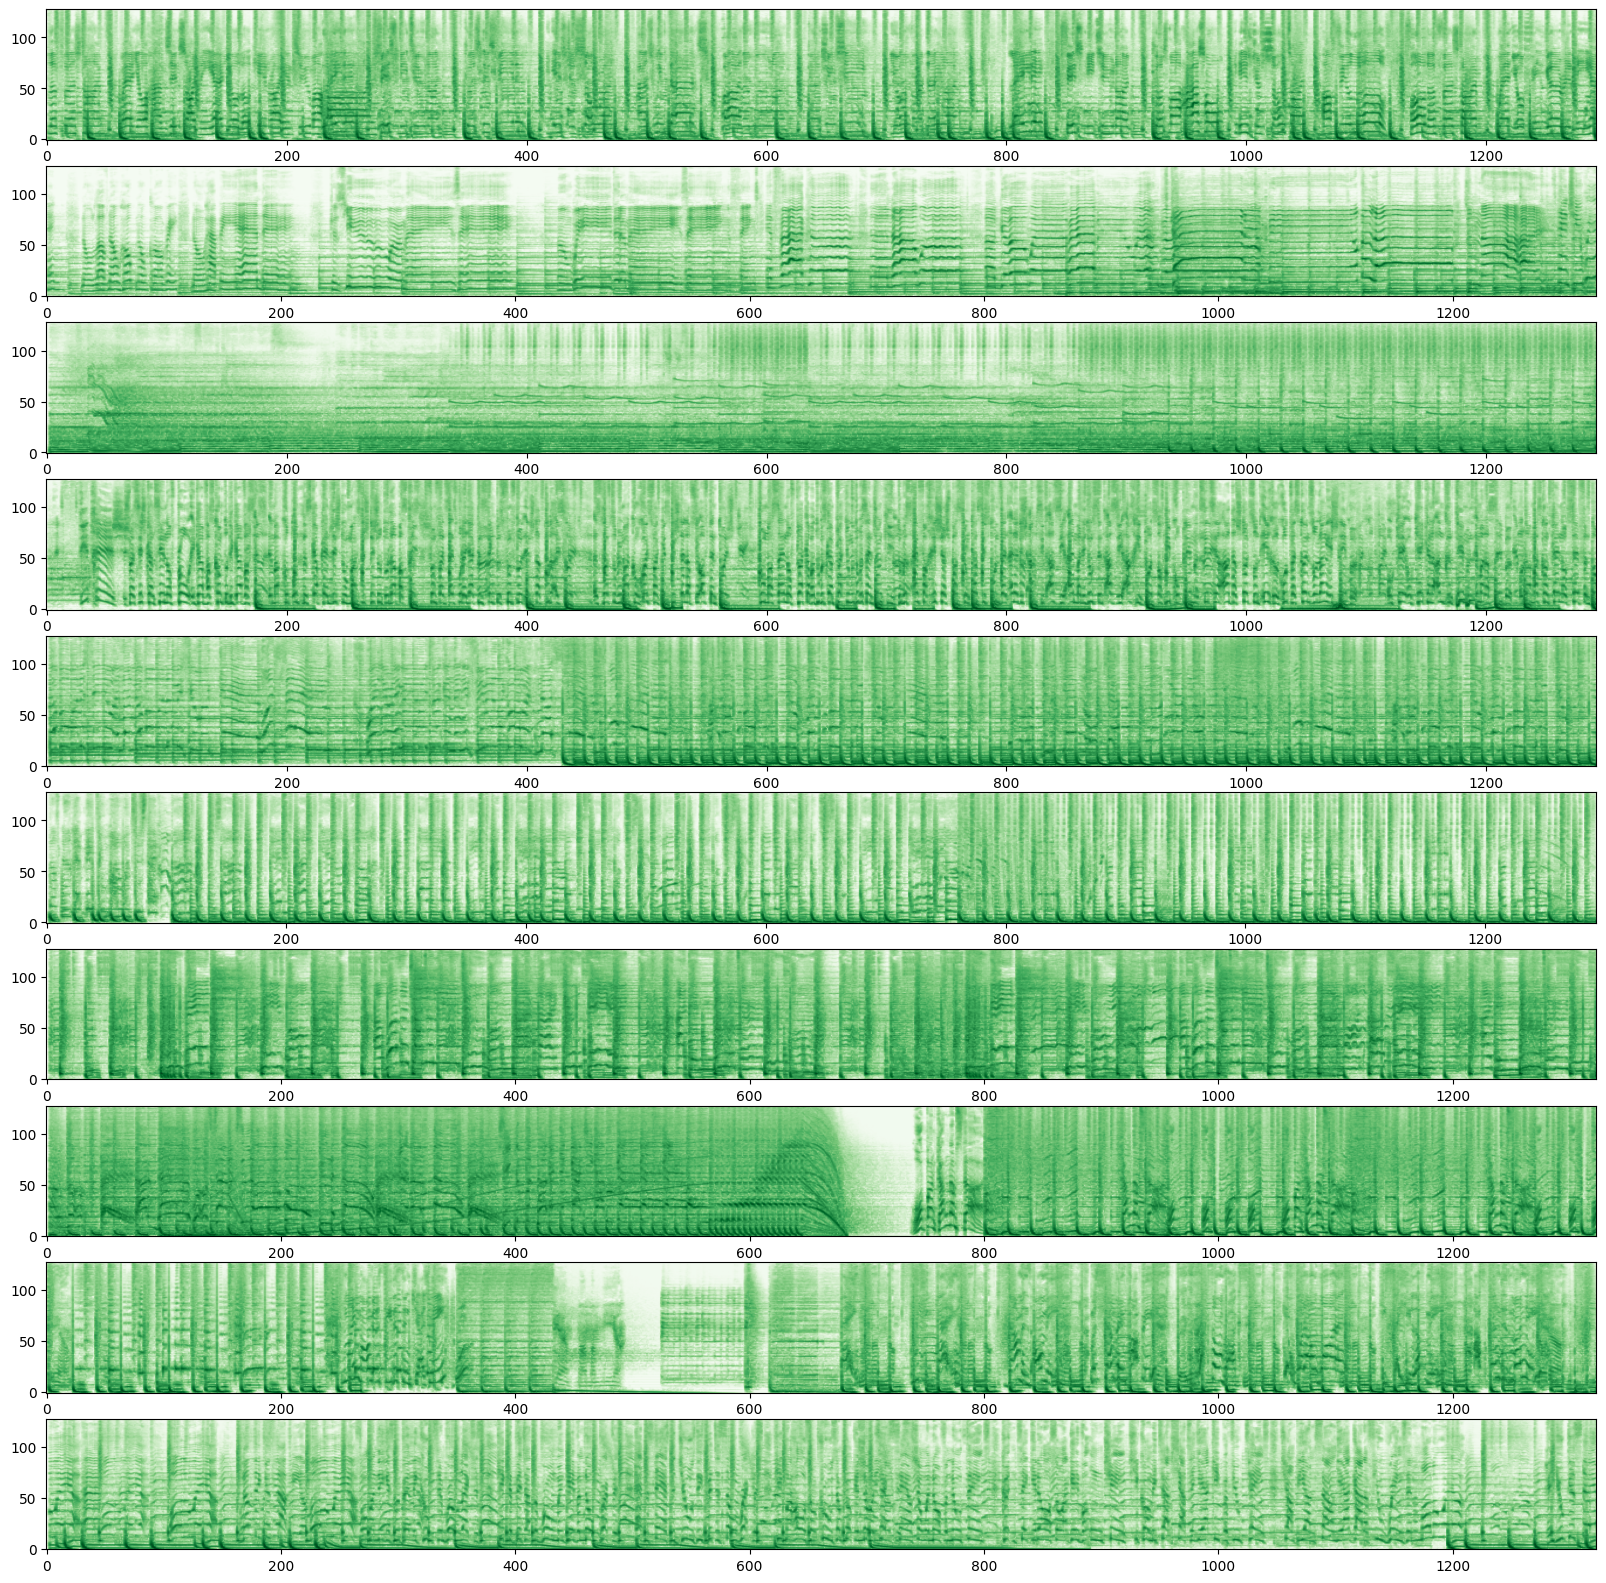

In [4]:
# plot spectograms
filenames = os.listdir(SPECTOGRAM_PATH) 
start, end = 10,20 
fig, ax = plt.subplots(len(filenames[start:end]), figsize=(20,20))
    
for idx, filename in enumerate(filenames[start:end]):
    D = np.load(SPECTOGRAM_PATH + filename)
    ax[idx].imshow(D, cmap='Greens', origin='lower', aspect='auto')

In [5]:
lengths = []
for spec in data:
    lengths.append(len(spec))
set(lengths)

{11136, 160128, 163328, 165376, 165504, 165632, 169216, 169344}

In [6]:
# bring all data on same size
data = np.array([data[i][0:np.min(lengths)] for i in range(len(data))], dtype=np.float64)

In [20]:
from sklearn.manifold import MDS

# fit MDS model data
mds = MDS(n_components=3, normalized_stress='auto')
data_reduced = mds.fit_transform(data)
#data_reduced

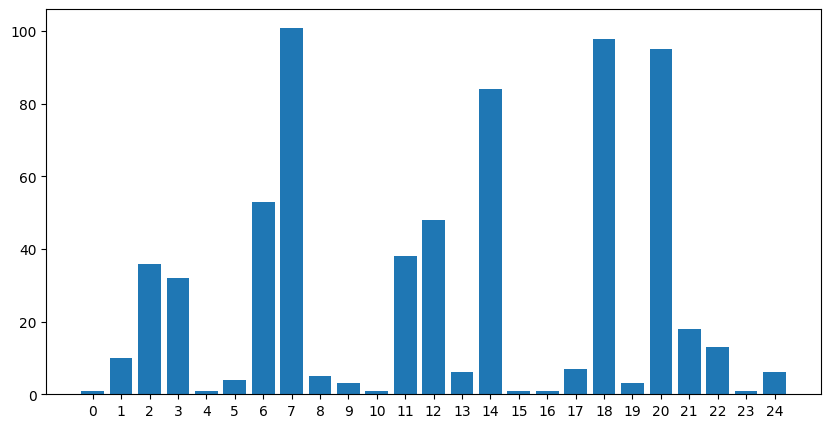

In [91]:
from sklearn.cluster import KMeans

# cluster the data
expected_cluster = 25
kmeans = KMeans(n_clusters=expected_cluster)
clusters = kmeans.fit_predict(data)

def custom_hist(arr):
    labels, counts = np.unique(arr, return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.show()

plt.figure(figsize=(10,5))
custom_hist(clusters)

In [125]:
# select cluster to disply in plot
idx_cluster = 7
cluster_idices = np.array([i for i in range(len(clusters))])[clusters == np.full((len(clusters)), idx_cluster)]

In [126]:
# plot the reduced data, color the cluster 
PLOT = go.FigureWidget()
scatter = PLOT.add_trace(go.Scatter3d(x = data_reduced[:,0],
                            y = data_reduced[:,1],
                            z = data_reduced[:,2],    
                            text = [f"genre:{clusters[i]}" for i in range(len(clusters))],
                            mode = 'markers',
                            hoverinfo="text",
                            marker=dict(
                                size=6,
                                color=clusters,
                                opacity=0.9,
                                line=dict(width=1)
                            ),
                           )
              )

def print_hello(trace, points, selector):
    match = re.search(r".{13}_(\d+).mp3.npy", filenames[points.point_inds[0]])
    if not match:
        print("Error opening URL")
    webbrowser.open_new_tab(f"https://www.deezer.com/de/track/{match.groups(1)[0]}")

scatter.data[0].on_click(print_hello);

# Add dropdown
PLOT.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                dict(
                    args=["marker", dict(size=6, color=clusters, opacity= 0.9, line=dict(width=1))],
                    label="All Clusters",
                    method="restyle"
                ),
                dict(
                    args=["marker", dict(size=6, color=[1 if i in cluster_idices else 0 for i in range(len(clusters))], opacity= 0.9, line=dict(width=1))],
                    label="Single Cluster",
                    method="restyle"
                ),
            ]),
        ),
    ]
)

PLOT.update_layout(
    margin=dict(l=30, r=30, t=30, b=40),
    paper_bgcolor="LightSteelBlue",
)

FigureWidget({
    'data': [{'hoverinfo': 'text',
              'marker': {'color': array([22,  7, 12, ..., 22,  6, 11]),
                         'line': {'width': 1},
                         'opacity': 0.9,
                         'size': 6},
              'mode': 'markers',
              'text': [genre:22, genre:7, genre:12, ..., genre:22, genre:6,
                       genre:11],
              'type': 'scatter3d',
              'uid': '768ebc4c-f9a2-40e2-b482-880ce2c4a414',
              'x': array([ 97.37623801, -65.66386808, -10.21923457, ...,  29.83874301,
                           -5.6655185 ,  10.2035186 ]),
              'y': array([  -1.7531679 ,   37.19139197,   83.74478109, ...,  -50.45262745,
                          -105.68244476,  118.48917032]),
              'z': array([  3.85265084,  45.42344588, -77.41324024, ..., -25.58841978,
                           83.06581818, -49.18751432])}],
    'layout': {'margin': {'b': 40, 'l': 30, 'r': 30, 't': 30},
              

In [74]:
def url_from_index(n, filenames):
    '''
    Returns a URL leading to the song on Deezer. 
    '''
    pattern = r".{13}_(\d+).mp3.npy"
    match = re.search(pattern, filenames[n])
    if not match:
        print(cluster[i])
    return f"https://www.deezer.com/de/track/{match.groups(1)[0]}"

def cluster_url(n, clusters, filenames):
    '''
    Returns a list of URL leading to the song on Deezer.
    '''
    cluster = np.array(filenames)[clusters == np.full((len(clusters)), n)]
    
    links = [None] * len(cluster)
    pattern = r".{13}_(\d+).mp3.npy"
    
    for i in range(len(cluster)):
        match = re.search(pattern, cluster[i])
        if not match:
            print(cluster[i])
            continue
        links[i] = f"https://www.deezer.com/de/track/{match.groups(1)[0]}"
        
    return links

In [75]:
url_from_index(492, filenames)

'https://www.deezer.com/de/track/2516525801'

In [76]:
cluster_url(2, clusters, filenames)

['https://www.deezer.com/de/track/145429544',
 'https://www.deezer.com/de/track/359342581',
 'https://www.deezer.com/de/track/12395240',
 'https://www.deezer.com/de/track/1043532222',
 'https://www.deezer.com/de/track/122841966',
 'https://www.deezer.com/de/track/401788552',
 'https://www.deezer.com/de/track/1591946491',
 'https://www.deezer.com/de/track/823182102',
 'https://www.deezer.com/de/track/36365261',
 'https://www.deezer.com/de/track/1560924',
 'https://www.deezer.com/de/track/1777117647',
 'https://www.deezer.com/de/track/687463872']

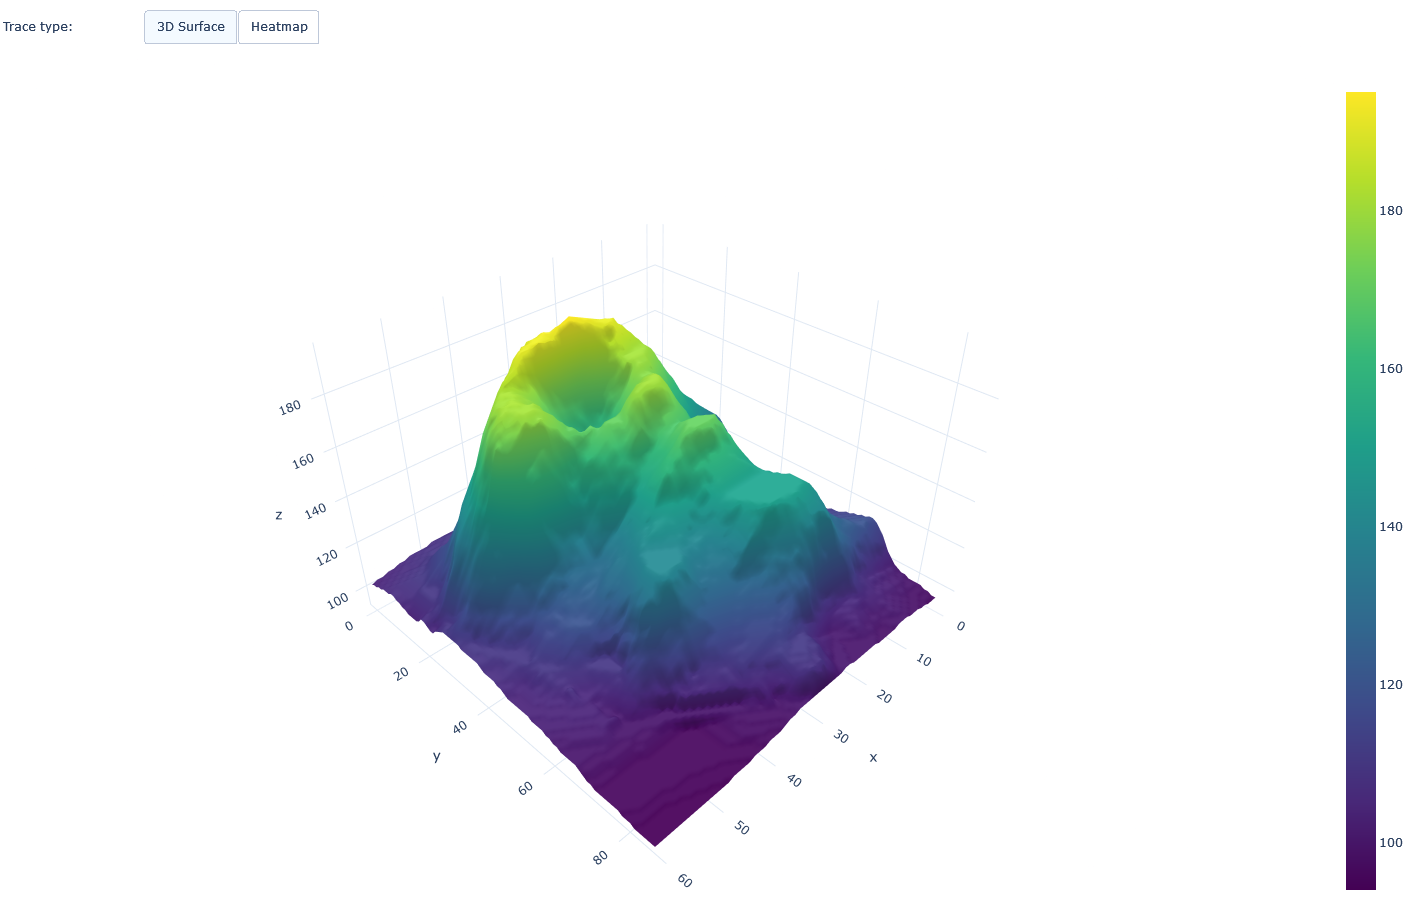

In [92]:
import plotly.graph_objects as go

import pandas as pd

# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Surface(z=df.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.11,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Trace type:", showarrow=False,
                             x=0, y=1.08, yref="paper", align="left")
    ]
)

fig.show()